# The task is to predict whether a person makes over dollar 50K a year or not

Features	Description
age	Age of the person
Workclass	Categorical variable having 8 categories each denoting the type of employment
fnlwgt	final weight.
education	Categorical variable with 16 categories each denoting the qualification of the person.
education-num	number of years of education
marital-status	Categorical variable with 7 categories
occupation	Categorical variable with 14 categories each denoting the type of occupation of the individual
relationship	Categorical variable with 6 categories.
race	Categorical variable with 5 categories each denoting the ethnicity of the individual
sex	Gender of the person
capital-gain	Continuous
capital-loss	Continuous
hours-per-week	Working hours per week
native-country	Categorical
Income	Target variable. 1 indicates >=50k. 0 indicates <50K

Y=TargetVariable =OutputVariable=Income


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
#to load datase
df=pd.read_csv("salary1.csv")
df.head()

,Unnamed: 0,age,Workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [3]:
df.shape # how many rows and column

(1032, 16)

In [4]:
#check null values
df.isnull().sum()

Unnamed: 0        0
age               0
Workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
Income            0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1032 entries, 0 to 1031
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      1032 non-null   int64 
 1   age             1032 non-null   int64 
 2   Workclass       1032 non-null   object
 3   fnlwgt          1032 non-null   int64 
 4   education       1032 non-null   object
 5   education-num   1032 non-null   int64 
 6   marital-status  1032 non-null   object
 7   occupation      1032 non-null   object
 8   relationship    1032 non-null   object
 9   race            1032 non-null   object
 10  sex             1032 non-null   object
 11  capital-gain    1032 non-null   int64 
 12  capital-loss    1032 non-null   int64 
 13  hours-per-week  1032 non-null   int64 
 14  native-country  1032 non-null   object
 15  Income          1032 non-null   int64 
dtypes: int64(8), object(8)
memory usage: 129.1+ KB


In [6]:
#As we saw some columns has Datatype as object and we can process only numeric data. We need to apply the label encoder
#select_dtypes()
#Separate the numerical data(int and float) and categorical data(object)
#First create dataframe name df_cat which hold object type data means categorical data
df_cat=df.select_dtypes(object) 
#here df_cat is a new dataframe for categorical type data
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1032 entries, 0 to 1031
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Workclass       1032 non-null   object
 1   education       1032 non-null   object
 2   marital-status  1032 non-null   object
 3   occupation      1032 non-null   object
 4   relationship    1032 non-null   object
 5   race            1032 non-null   object
 6   sex             1032 non-null   object
 7   native-country  1032 non-null   object
dtypes: object(8)
memory usage: 64.6+ KB


In [7]:
#Now create second dataframe name df_num
#which hold int and float type data means numerical data
df_num=df.select_dtypes(['int64','float64'])
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1032 entries, 0 to 1031
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Unnamed: 0      1032 non-null   int64
 1   age             1032 non-null   int64
 2   fnlwgt          1032 non-null   int64
 3   education-num   1032 non-null   int64
 4   capital-gain    1032 non-null   int64
 5   capital-loss    1032 non-null   int64
 6   hours-per-week  1032 non-null   int64
 7   Income          1032 non-null   int64
dtypes: int64(8)
memory usage: 64.6 KB


In [8]:
#Call LabelEncoder inbuilt class from sklearn.preprocessing library
from sklearn.preprocessing import LabelEncoder

In [9]:
#Create object of LabelEncoder class
le=LabelEncoder()

In [10]:
#Convert catgorical data into numeric data
for col in df_cat:
    #create object of LabelEncoder class
    le=LabelEncoder()
    df_cat[col]=le.fit_transform(df_cat[col])   

In [11]:
#Again check teh datatype of sorted DataFrame for categorical datatype
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1032 entries, 0 to 1031
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Workclass       1032 non-null   int32
 1   education       1032 non-null   int32
 2   marital-status  1032 non-null   int32
 3   occupation      1032 non-null   int32
 4   relationship    1032 non-null   int32
 5   race            1032 non-null   int32
 6   sex             1032 non-null   int32
 7   native-country  1032 non-null   int32
dtypes: int32(8)
memory usage: 32.4 KB


In [12]:
#Create new DataFrae to combine converted dataframe and numerical data frame.
#We will use Pandas Inbuilt method concat()
df_new=pd.concat([df_num,df_cat],axis=1) #join column wise make axis=1
df_new.head()

,Unnamed: 0,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,Income,Workclass,education,marital-status,occupation,relationship,race,sex,native-country
0,0,39,77516,13,2174,0,40,0,5,9,4,0,1,4,1,28
1,1,50,83311,13,0,0,13,0,4,9,2,3,0,4,1,28
2,2,38,215646,9,0,0,40,0,2,11,0,5,1,4,1,28
3,3,53,234721,7,0,0,40,0,2,1,2,5,0,2,1,28
4,4,28,338409,13,0,0,40,0,2,9,2,9,5,2,0,4


In [13]:
#Now check the unique elements of column occupation
df_new["occupation"].unique()

array([ 0,  3,  5,  9,  7, 11, 13,  4,  6, 12,  2, 10,  1,  8])

In [14]:
#Check unique elements for all columns
for col in df_new:
    print(col)
    print(df_new[col].unique())

Unnamed: 0
[   0    1    2 ... 1117 1118 1119]
age
[39 50 38 53 28 37 49 52 31 42 30 23 32 34 25 43 40 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 47 46 36 79 27 18 33 76 55 61 70 64 71 66 51 58
 26 17 60 90 75 65 77 62 63 67 74 72 69 68 73 81 78]
fnlwgt
[ 77516  83311 215646 ... 227644 205267 288020]
education-num
[13  9  7 14  5 10 12  4 16 11 15  3  6  1  8  2]
capital-gain
[ 2174     0 14084  5178  5013  2407 14344 15024  7688  4064  4386  7298
  1409  3674  1055  2050  2176   594 20051  6849  4101  8614  3411  2597
 25236  4650  2463  3103 10605  2964  3325  2580  3471]
capital-loss
[   0 2042 1408 1902 1887 1719 1762 1564 2179 1816 1980 1977 1876 1340
 2206 1741 1485 2339 2415 1380 1721 2051 2377 1669 2352 1672  653 2392
 1504 1590 1651]
hours-per-week
[40 13 16 45 50 80 30 35 60 20 52 44 15 25 43 38 55 48 58 32 70 22 56 41
 28 36 24 46  2 42 12 65  1 34 75 98 33 54 10  6 64 19 18 72  8  9 47 37
 21 26 14  5  7 99]
Income
[0 1]
Workclass
[5 4 2 0 1 3]
education
[ 9 11  1 12  6 

In [15]:
#Now we dont need that unanmed column..as it is not useful. Remove that by drop ()
df_new.drop("Unnamed: 0",axis=1,inplace=True)#Make inplace = True to remove column permanently
df_new.columns

Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'Income', 'Workclass', 'education', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'native-country'],
      dtype='object')

In [16]:
#Separate input and Output
X=df_new.drop("Income",axis=1)#input selection.temporary as inplace=True not used
Y=df_new["Income"]#output
df.columns

Index(['Unnamed: 0', 'age', 'Workclass', 'fnlwgt', 'education',
       'education-num', 'marital-status', 'occupation', 'relationship', 'race',
       'sex', 'capital-gain', 'capital-loss', 'hours-per-week',
       'native-country', 'Income'],
      dtype='object')

In [17]:
X.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,Workclass,education,marital-status,occupation,relationship,race,sex,native-country
0,39,77516,13,2174,0,40,5,9,4,0,1,4,1,28
1,50,83311,13,0,0,13,4,9,2,3,0,4,1,28
2,38,215646,9,0,0,40,2,11,0,5,1,4,1,28
3,53,234721,7,0,0,40,2,1,2,5,0,2,1,28
4,28,338409,13,0,0,40,2,9,2,9,5,2,0,4


In [18]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: Income, dtype: int64

In [19]:
#Our Target variable is Income so drop that from Input variable list
#If record predicts 1 then it is YES and if it predicts 0 then it is NO
#The given dataset is classification dataset. So we have to make predictions using Classification algorithm.
#First we will workout Logistic Regression and then Confusion Matrix

In [20]:
#For Training the model call inbuilt class train_test_split
from sklearn.model_selection import train_test_split

In [21]:
#We will consider 70%:30% ratio for trating : testing
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3, random_state=1)

In [22]:
#In Classification, Logistic Regression is used to create baseline model
#Call the class inbuilt LogisticRegression
from sklearn.linear_model import LogisticRegression

In [23]:
# Create the object of LogisticRegression Class
lgr=LogisticRegression()

In [24]:
#Train the model, using inbuilt method fit()
lgr.fit(X_train,Y_train)

LogisticRegression()

In [25]:
#Test model using predict(),inbuilt method of Logistic Regression
#Logic behind predict():Y_pred=1/(1+exp(-X))
Y_pred=lgr.predict(X_test)

In [26]:
#Check Y_pred values are in binary form or not?
Y_pred

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,

In [27]:
#Now compare What was output as per records with what is output predicted by machine
d={"Actual as per Records":Y_test,"Predicted by Machine":Y_pred}
#put output in dataframe d1 for reference
d1=pd.DataFrame(d)
d1.head(20)

,Actual as per Records,Predicted by Machine
339,0,0
244,0,0
862,1,1
567,0,0
926,0,0
358,0,0
576,1,0
27,0,0
997,0,0
563,0,0


In [28]:
#Check the Accuracy of the model score () inbuilt method of Logistic Regression
lgr.score(X_test,Y_test)

0.8

In [29]:
#Score is good but not Excellent
#Though the Score is good/excellent we have to compare the Evaluation Matrix of accuracy, recall, precision and f1-score.

In [30]:
#For Evaluation Matrix call the accuracy,recall, precision and f1-score classes from Library 
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score

In [31]:
accuracy_score(Y_test,Y_pred)#similar to score() of logistic regression

0.8

In [32]:
recall_score(Y_test,Y_pred)

0.2638888888888889

In [33]:
precision_score(Y_test,Y_pred)

0.6785714285714286

In [34]:
f1_score(Y_test,Y_pred)

0.38

In [35]:
#To generate classification_report call classification_report() inbuilt function which define in classification_report class
from sklearn.metrics import classification_report

In [36]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.81      0.96      0.88       238
           1       0.68      0.26      0.38        72

    accuracy                           0.80       310
   macro avg       0.75      0.61      0.63       310
weighted avg       0.78      0.80      0.76       310



In [37]:
#The above results we got from unprocessed data. 

In [38]:
#To evaluate the accuracy of a classification we need to draw Confusion Matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test,Y_pred))

[[229   9]
 [ 53  19]]


In [39]:
TP,FP,FN,TN=confusion_matrix(Y_test,Y_pred).ravel() #ravel () converts 2D array to 1D array
print("True Positive:",TP)
print("False Positive:",FP)
print("False Negative:",FN)
print("True Negative:",TN)

True Positive: 229
False Positive: 9
False Negative: 53
True Negative: 19


In [40]:
#Now preprocessing
#First analysis
#Feature Selection:manually
#Use visualisation for feature selection

In [41]:
X.columns

Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'Workclass', 'education', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'native-country'],
      dtype='object')

In [42]:
#countplot for Categorical Datatype
#scatterplot for Numerical Datatype

In [43]:
df_cat.columns

Index(['Workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country'],
      dtype='object')

In [44]:
df_num.columns

Index(['Unnamed: 0', 'age', 'fnlwgt', 'education-num', 'capital-gain',
       'capital-loss', 'hours-per-week', 'Income'],
      dtype='object')

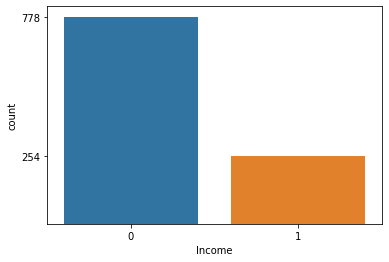

In [45]:
#Sample checking
#first:check how many person make dollar 50k in year means target variable Income
sns.countplot(data=df_new,x="Income")
c=df_new["Income"].value_counts()
plt.yticks(c)
plt.show()

In [46]:
#Chances that People who are having income will likely earn 50K in year

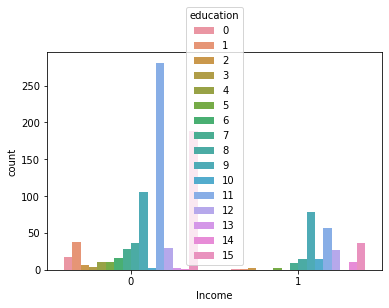

<Figure size 576x432 with 0 Axes>

In [47]:
#Now check education is important input features or not to predict the o/p
sns.countplot(data=df_new,x="Income",hue="education")
fig=plt.figure(figsize=(8,6))
plt.show()

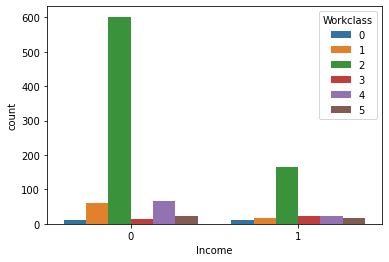

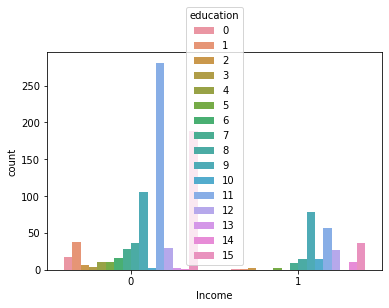

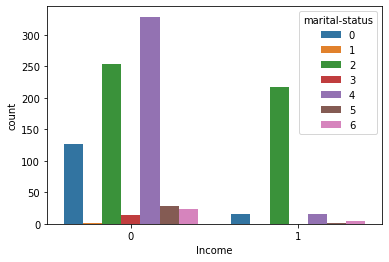

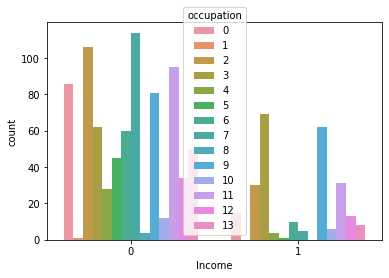

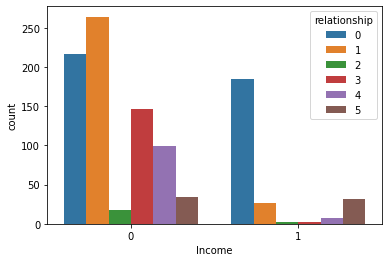

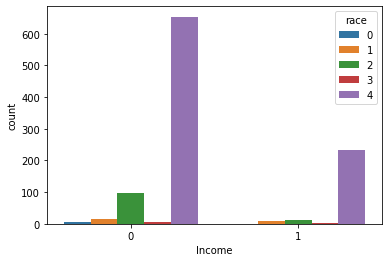

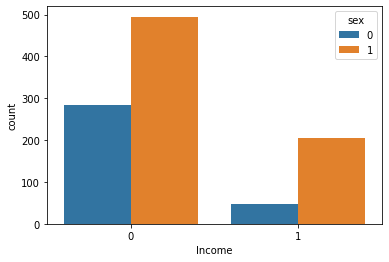

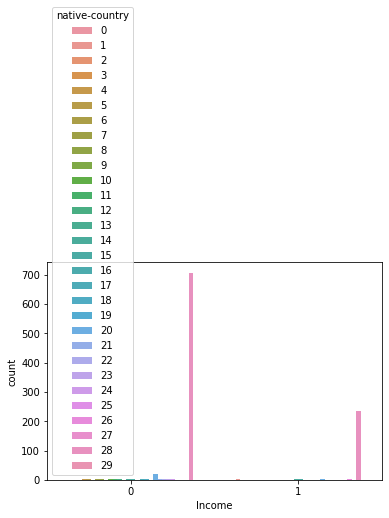

In [48]:
#Check for all Categorical data
for col in df_cat:
    sns.countplot(data=df_new,x="Income",hue=df_cat[col])
    plt.show()


In [49]:
#From above graphs we learnt that Occupation is not a important feature to predict the output as graph is balanced for 0 & 1

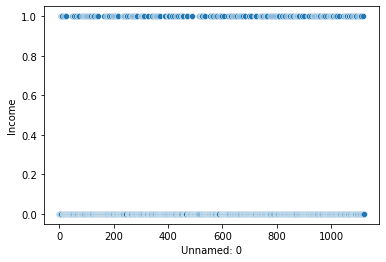

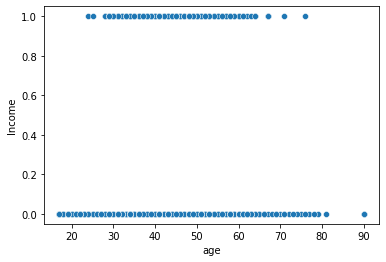

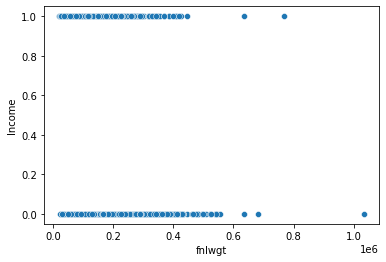

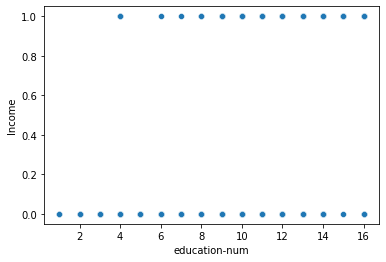

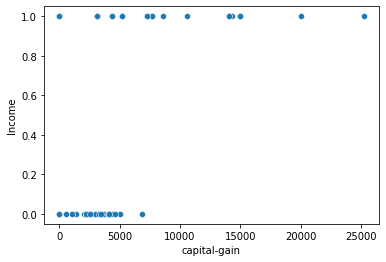

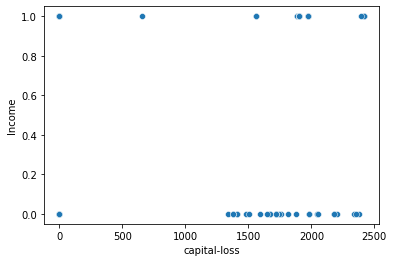

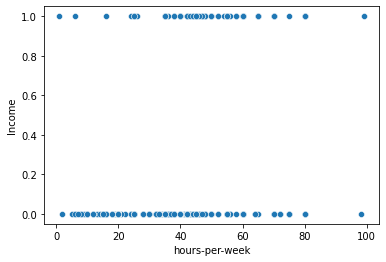

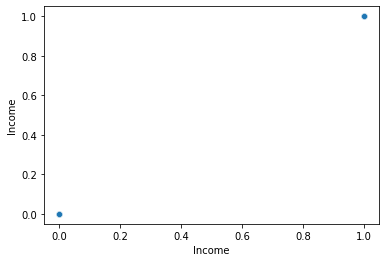

In [50]:
#Check for all Numerical data
for col in df_num:
    sns.scatterplot(data=df_new,x=df_num[col],y="Income")
    plt.show()

In [51]:
#We dont have to check Income Vs Income graph and Unnamed Vs Income Graph. 
#They are mistakenly considered as columns of df_num are taken to plot graphs
#hours-per-week,fnlwgt & education-num is not an imporatant feature as it has balanced graph

# Conclusion Steps

In [52]:
#Consider the important inputs
X=df_new[['Workclass', 'education', 'marital-status','relationship', 'race', 'sex', 'native-country','age',
      'capital-gain','capital-loss', 'hours-per-week', 'Income']]#input always 2D array
Y=df_new['Income']#output always 1D array

In [53]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3, random_state=1)

In [54]:
lgr=LogisticRegression()

In [55]:
#Train the model
lgr.fit(X_train,Y_train)

LogisticRegression()

In [56]:
# testing the model
Y_pred=lgr.predict(X_test)

In [57]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       238
           1       0.82      0.75      0.78        72

    accuracy                           0.90       310
   macro avg       0.87      0.85      0.86       310
weighted avg       0.90      0.90      0.90       310



In [ ]:
#From classification report we can see that after preprocessing scores are improved. 
#So, now print the confusion matrix for more clariy

In [60]:
print(confusion_matrix(Y_test,Y_pred))


[[226  12]
 [ 18  54]]


In [62]:
TP,FP,FN,TN=confusion_matrix(Y_test,Y_pred).ravel() #ravel () converts 2D array to 1D array
print("True Positive:",TP)
print("False Positive:",FP)
print("False Negative:",FN)
print("True Negative:",TN)

True Positive: 226
False Positive: 12
False Negative: 18
True Negative: 54


In [ ]:
#End Note : Most of the people will make 50K in year